![Alt text](https://imgur.com/orZWHly.png=80)
source: @allison_horst https://github.com/allisonhorst/penguins

You have been asked to support a team of researchers who have been collecting data about penguins in Antartica! The data is available in csv-Format as `penguins.csv`

**Origin of this data** : Data were collected and made available by Dr. Kristen Gorman and the Palmer Station, Antarctica LTER, a member of the Long Term Ecological Research Network.

**The dataset consists of 5 columns.**

Column | Description
--- | ---
culmen_length_mm | culmen length (mm)
culmen_depth_mm | culmen depth (mm)
flipper_length_mm | flipper length (mm)
body_mass_g | body mass (g)
sex | penguin sex

Unfortunately, they have not been able to record the species of penguin, but they know that there are **at least three** species that are native to the region: **Adelie**, **Chinstrap**, and **Gentoo**.  Your task is to apply your data science skills to help them identify groups in the dataset!

In [27]:
# Import Required Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Loading and examining the dataset
penguins_df = pd.read_csv("penguins.csv")
penguins_df.head()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,39.1,18.7,181.0,3750.0,MALE
1,39.5,17.4,186.0,3800.0,FEMALE
2,40.3,18.0,195.0,3250.0,FEMALE
3,36.7,19.3,193.0,3450.0,FEMALE
4,39.3,20.6,190.0,3650.0,MALE


In [28]:
df_dummies = pd.get_dummies(penguins_df)
print(df_dummies)

     culmen_length_mm  culmen_depth_mm  ...  sex_FEMALE  sex_MALE
0                39.1             18.7  ...           0         1
1                39.5             17.4  ...           1         0
2                40.3             18.0  ...           1         0
3                36.7             19.3  ...           1         0
4                39.3             20.6  ...           0         1
..                ...              ...  ...         ...       ...
327              47.2             13.7  ...           1         0
328              46.8             14.3  ...           1         0
329              50.4             15.7  ...           0         1
330              45.2             14.8  ...           1         0
331              49.9             16.1  ...           0         1

[332 rows x 6 columns]


In [29]:
column_names= df_dummies.columns
print(column_names)

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g', 'sex_FEMALE', 'sex_MALE'],
      dtype='object')


In [30]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_dummies.to_numpy())
df_scaled = pd.DataFrame(df_scaled, columns=[
  column_names])
print(df_scaled)

    culmen_length_mm culmen_depth_mm  ... sex_FEMALE  sex_MALE
0          -0.903906        0.790360  ...  -0.993994  0.993994
1          -0.830434        0.126187  ...   1.006042 -1.006042
2          -0.683490        0.432728  ...   1.006042 -1.006042
3          -1.344738        1.096901  ...   1.006042 -1.006042
4          -0.867170        1.761074  ...  -0.993994  0.993994
..               ...             ...  ...        ...       ...
327         0.583904       -1.764152  ...   1.006042 -1.006042
328         0.510432       -1.457611  ...   1.006042 -1.006042
329         1.171681       -0.742347  ...  -0.993994  0.993994
330         0.216543       -1.202160  ...   1.006042 -1.006042
331         1.079841       -0.537986  ...  -0.993994  0.993994

[332 rows x 6 columns]


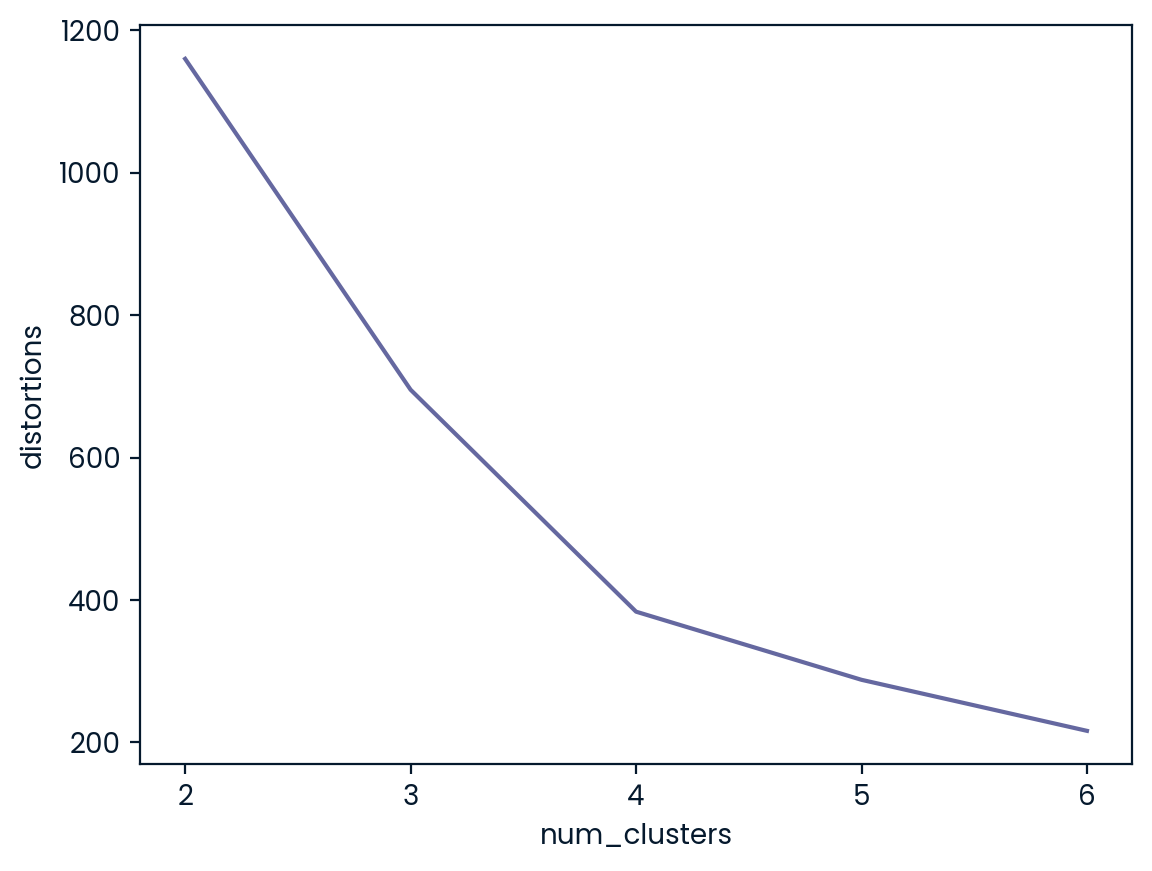

In [31]:
num_clusters=range(2, 7)
distortions= []
for i in num_clusters:
    kmeans = KMeans(n_clusters=i, init="k-means++", random_state=42).fit(df_scaled)
    distortions.append(kmeans.inertia_)
elbow_plot = pd.DataFrame({'num_clusters': num_clusters, 'distortions': distortions})
sns.lineplot(x='num_clusters', y='distortions', data = elbow_plot)
plt.xticks(num_clusters)
plt.show()

In [32]:
method=KMeans(n_clusters=4, init="k-means++", random_state=42)
method.fit(df_scaled)
penguins_df['label']=method.labels_
print(penguins_df.head())

   culmen_length_mm  culmen_depth_mm  ...     sex  label
0              39.1             18.7  ...    MALE      0
1              39.5             17.4  ...  FEMALE      1
2              40.3             18.0  ...  FEMALE      1
3              36.7             19.3  ...  FEMALE      1
4              39.3             20.6  ...    MALE      0

[5 rows x 6 columns]


In [33]:
numeric_columns = ['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm', 'body_mass_g']
stat_penguins = penguins_df.groupby('label')[numeric_columns].mean()
print(stat_penguins)

       culmen_length_mm  culmen_depth_mm  flipper_length_mm  body_mass_g
label                                                                   
0             43.878302        19.111321         194.764151  4006.603774
1             40.217757        17.611215         189.046729  3419.158879
2             49.473770        15.718033         221.540984  5484.836066
3             45.563793        14.237931         212.706897  4679.741379
